# Blatt 5

## Aufgabe 3
Das folgende Bild zeigt sog. Sternspuren, die bei der Aufnahme des Sternhimmels mit
l ̈angerer Belichtungszeit aufgrund der Erdrotation entstehen.
![Sternspuren](ISON.jpg)
Versuche durch Dekonvolution mit einer Standard-Sternspur (als Kernel) die Rotation der
Erde herauszurechnen. Zu sehen sein sollte dann die Bewegung des Kometen ISON, der auf
dem Bild aufgenommen wurde, vor dem Sternenhintergrund.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original')

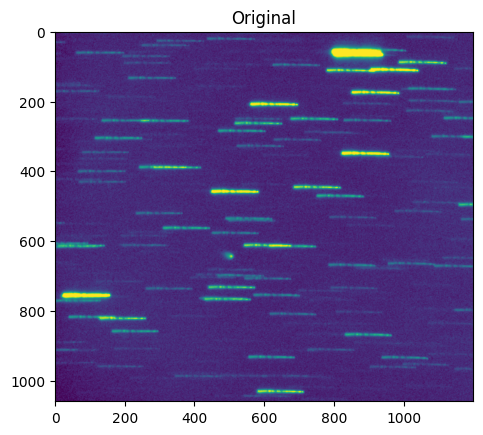

In [3]:
img = plt.imread('ISON.jpg')
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img)
plt.title('Original')

Text(0.5, 1.0, 'Fourier Transform')

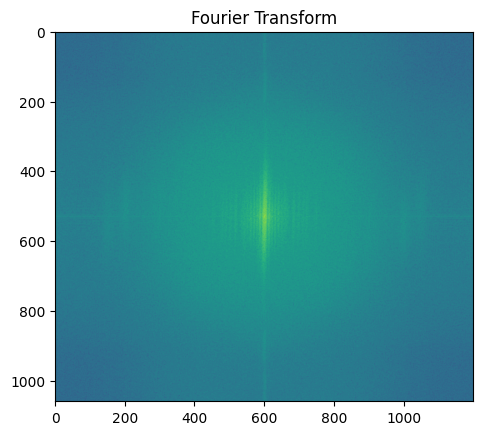

In [9]:
img_fft = np.fft.fft2(img)

img_fft = np.fft.fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft)))
plt.title('Fourier Transform')

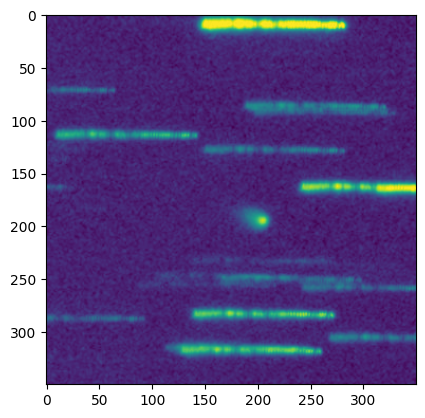

In [16]:
# crop to area with comet
crop = img[450:800,300:650]
plt.imshow(crop)

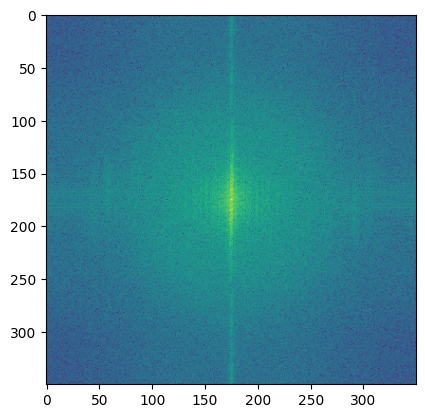

In [19]:
crop_fft = np.fft.fft2(crop)
crop_fft = np.fft.fftshift(crop_fft)

plt.imshow(np.log(np.abs(crop_fft)))

In [33]:
# Bojan Nikolic <b.nikolic@mrao.cam.ac.uk>, <bojan@bnikolic.co.uk> 
# Initial version August 2010
#
# This file is part of pydeconv. This work is licensed under GNU GPL
# V2 (http://www.gnu.org/licenses/gpl.html)
"""
Clean based deconvolution, using np
"""

def overlapIndices(a1, a2, 
                   shiftx, shifty):
    if shiftx >=0:
        a1xbeg=shiftx
        a2xbeg=0
        a1xend=a1.shape[0]
        a2xend=a1.shape[0]-shiftx
    else:
        a1xbeg=0
        a2xbeg=-shiftx
        a1xend=a1.shape[0]+shiftx
        a2xend=a1.shape[0]

    if shifty >=0:
        a1ybeg=shifty
        a2ybeg=0
        a1yend=a1.shape[1]
        a2yend=a1.shape[1]-shifty
    else:
        a1ybeg=0
        a2ybeg=-shifty
        a1yend=a1.shape[1]+shifty
        a2yend=a1.shape[1]

    return (int(a1xbeg), int(a1xend), int(a1ybeg), int(a1yend)), (int(a2xbeg), int(a2xend), int(a2ybeg), int(a2yend))

        



In [34]:
def hogbom(dirty,
           psf,
           window,
           gain,
           thresh,
           niter):
    """
    Hogbom clean

    :param dirty: The dirty image, i.e., the image to be deconvolved

    :param psf: The point spread-function

    :param window: Regions where clean components are allowed. If
    True, thank all of the dirty image is assumed to be allowed for
    clean components

    :param gain: The "loop gain", i.e., the fraction of the brightest
    pixel that is removed in each iteration

    :param thresh: Cleaning stops when the maximum of the absolute
    deviation of the residual is less than this value

    :param niter: Maximum number of components to make if the
    threshold "thresh" is not hit
    """
    comps=np.zeros(dirty.shape)
    res=np.array(dirty)
    if window is True:
        window=np.ones(dirty.shape,
                          np.bool_)
    for i in range(niter):
        mx, my=np.unravel_index(np.abs(res[window]).argmax(), res.shape)
        mval=res[mx, my]*gain
        comps[mx, my]+=mval
        a1o, a2o=overlapIndices(dirty, psf,
                                mx-dirty.shape[0]/2,
                                my-dirty.shape[1]/2)
        res[a1o[0]:a1o[1],a1o[2]:a1o[3]]-=psf[a2o[0]:a2o[1],a2o[2]:a2o[3]]*mval
        if np.abs(res).max() < thresh:
            break
    return comps, res

In [39]:
# clean img
comps, res = hogbom(crop_fft, np.ones((350,350)), True, 0.1, 0.1, 1000)

/tmp/ipykernel_4117938/4174852960.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  comps[mx, my]+=mval


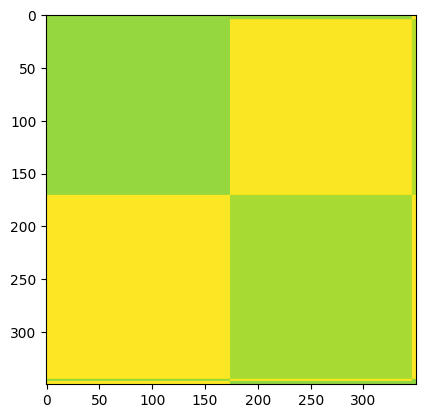

In [40]:
plt.imshow(np.log(np.abs(res)))

/tmp/ipykernel_4117938/3702161429.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(comps)))


array([[        0.        ,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [-14425146.20135875,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [        0.        ,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       ...,
       [        0.        ,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [        0.        ,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [        0.        ,         0.        ,         0.        , ...,
                0.        ,         0.        ,  -3003576.14989356]])

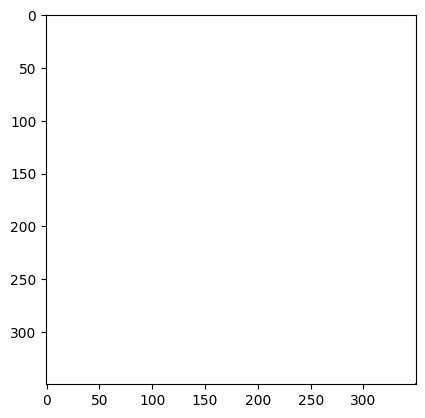

In [42]:
plt.imshow(np.log(np.abs(comps)))
comps